In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from glob import glob
import pandas as pd
import pickle
from torch.utils.data import RandomSampler
import random
import scipy
import torch.nn.functional as F
from PIL import Image
from glob import glob
import wandb
import re
from adjustText import adjust_text
import seaborn as sns
import scipy
import statannot
import argparse
import codecs
import sys
sys.path.append('./modified_medsam_repo')
from MedSAM_HCP.utils_hcp import *
from MedSAM_HCP.dataset import *
import pydicom

In [7]:
ds = pydicom.dcmread("/gpfs/data/luilab/karthik/annotated_scans_data/Luiexam1 SG/IMAGES/IM00004")
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.45.1.7.4.207360514638673.23082913534800007.46085
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.5
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_365'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0012) Instance Creation Date              DA: '20220210'
(0008, 0013) Instance Creation Time              TM: '230421'
(0008, 0016) SOP 

In [16]:
ds.pixel_array.itemset()

ValueError: itemset must have at least one argument

In [14]:
dir(ds.pixel_array)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [81]:

filenames = glob('/gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/*')

for x in filenames:
    try:
        last_part = os.path.basename(x)
        ds = pydicom.dcmread(x)
        sl = ds.pixel_array
        sl = (ds.pixel_array / np.max(ds.pixel_array) * 255).astype('uint8')
        img = Image.fromarray(sl)
        img.save(f'/gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/pil_imaged/{last_part}.png')
    except:
        print(f'err at {x}')


err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02640
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02636
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02649
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM03498
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM03501
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02641
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM03497
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02639
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02647
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02644
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM03499
err at /gpfs/data/luilab/karthik/annotated_scans_data/Luiexam2 PP/IMAGES/IM02648
err at /gpfs/data/luilab/kar

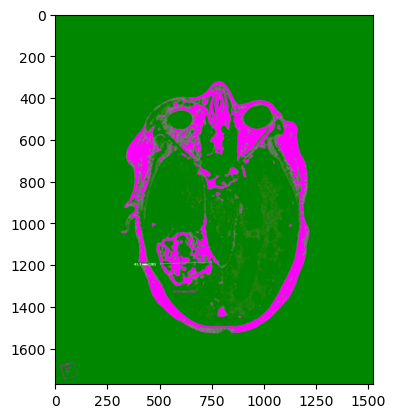

In [9]:
sl = ds.pixel_array

plt.imshow(sl, plt.cm.bone)

In [4]:
ds.pixel_array.shape

(74, 74)

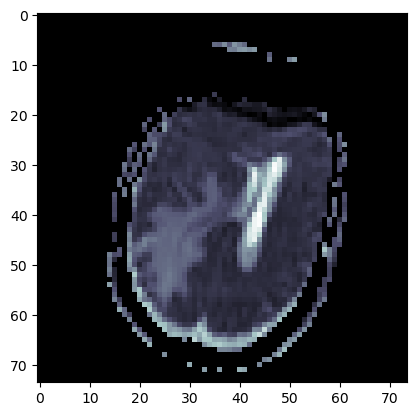